In [1]:
from sklearn.linear_model import LinearRegression  # Use Linear Regression instead of DecisionTree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
df = pd.read_csv('car_engine_mileage.csv')
df

,Car,Engine_Size_Liters,Mileage_kmpl
0,Toyota Camry,2.5,15
1,Honda Civic,2.0,14
2,Ford Fiesta,1.6,18
3,Chevrolet Malibu,2.5,13
4,Nissan Altima,2.5,12
5,Kia Stinger,3.3,11


In [5]:
# Initialize LabelEncoders
label_encoder_car = LabelEncoder()

# Label encoding for categorical column (Car)
df['Car'] = label_encoder_car.fit_transform(df['Car'])

In [7]:
df

,Car,Engine_Size_Liters,Mileage_kmpl
0,5,2.5,15
1,2,2.0,14
2,1,1.6,18
3,0,2.5,13
4,4,2.5,12
5,3,3.3,11


In [9]:
# Ensure Mileage_kmpl is numeric
# df['Mileage_kmpl'] = pd.to_numeric(df['Mileage_kmpl'], errors='coerce')

In [11]:
df

,Car,Engine_Size_Liters,Mileage_kmpl
0,5,2.5,15
1,2,2.0,14
2,1,1.6,18
3,0,2.5,13
4,4,2.5,12
5,3,3.3,11


In [13]:
# Features and target
X = df[['Engine_Size_Liters', 'Car']].values
y = df['Mileage_kmpl'].values

In [15]:
X

array([[2.5, 5. ],
       [2. , 2. ],
       [1.6, 1. ],
       [2.5, 0. ],
       [2.5, 4. ],
       [3.3, 3. ]])

In [17]:
y

array([15, 14, 18, 13, 12, 11], dtype=int64)

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train

array([[3.3, 3. ],
       [1.6, 1. ],
       [2.5, 4. ],
       [2.5, 0. ]])

In [23]:
X_test

array([[2.5, 5. ],
       [2. , 2. ]])

In [25]:
y_train

array([11, 18, 12, 13], dtype=int64)

In [27]:
y_test

array([15, 14], dtype=int64)

In [29]:
# Initialize and fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([12.69227449, 15.35325852])

In [35]:
# Calculate R-squared value to measure the model performance
r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score}")

R-squared: -13.313811297741315


In [41]:

# Predict for a new sample (for example: Engine Size = 2L, Car encoded as 0)
new_sample = np.array([[2, 0]])  # Example: Engine Size = 2L, Car encoded as 0
predicted_mileage = model.predict(new_sample)
print("Predicted mileage for new sample (kmpl):", predicted_mileage[0])

Predicted mileage for new sample (kmpl): 15.826715580492017


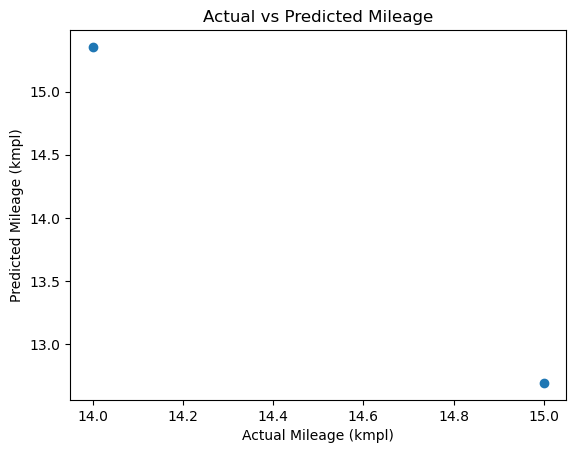

In [45]:
plt.line(y_test, y_pred)
plt.xlabel("Actual Mileage (kmpl)")
plt.ylabel("Predicted Mileage (kmpl)")
plt.title("Actual vs Predicted Mileage")
plt.show()

C:\Users\mas12\AppData\Local\Temp\ipykernel_26332\1367516937.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


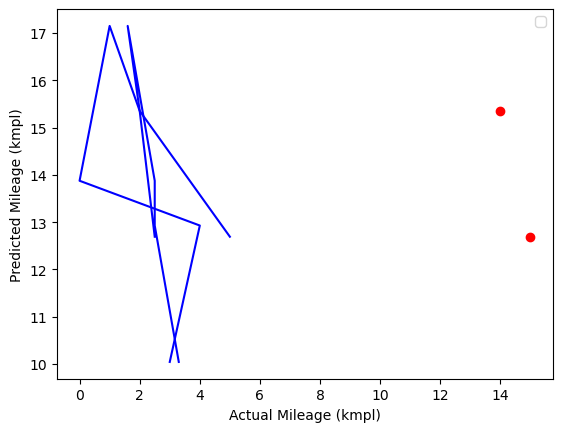

In [55]:
plt.scatter (y_test,y_pred, color="red")
plt.xlabel("Actual Mileage (kmpl)")
plt.ylabel("Predicted Mileage (kmpl)")
plt.plot(X, model.predict(X),color='blue')
plt.legend()
plt.show()